<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/pollution_data.csv')

# Display the first few rows of the dataset and its basic info
data_head = data.head()
data_info = data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35596 entries, 0 to 35595
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            35596 non-null  object 
 1   City                            35596 non-null  object 
 2   County                          35596 non-null  object 
 3   State                           35596 non-null  object 
 4   Population Staying at Home      35596 non-null  object 
 5   Population Not Staying at Home  35596 non-null  object 
 6   mil_miles                       35596 non-null  float64
 7   past_week_avg_miles             35596 non-null  float64
 8   latitude                        35596 non-null  float64
 9   longitude                       35596 non-null  float64
 10  o3_min                          33950 non-null  float64
 11  o3_max                          33950 non-null  float64
 12  o3_median                       

(         Date         City      County State Population Staying at Home  \
 0  2019-01-01  albuquerque  bernalillo    NM                   1,77,171   
 1  2019-01-01      atlanta      fulton    GA                   2,83,093   
 2  2019-01-01       austin      travis    TX                   2,68,732   
 3  2019-01-01    baltimore     baltimo    MD                   1,91,486   
 4  2019-01-01        boise         ada    ID                   1,05,237   
 
   Population Not Staying at Home  mil_miles  past_week_avg_miles   latitude  \
 0                       4,99,456  19.038463                  0.0  35.107209   
 1                       7,63,811  29.295609                  0.0  33.760109   
 2                       9,76,194  27.286079                  0.0  30.283333   
 3                       4,09,167  12.961132                  0.0  39.305833   
 4                       3,63,293  12.640954                  0.0  43.604545   
 
     longitude  ...  pm10_max  pm10_median  pm10_variance  p

The dataset consists of 35,596 entries and 71 columns, providing a wealth of information about pollution, population movement, and other variables across various cities, counties, and states.

**Summary of the first few rows:**

- **Date:** Ranges from 2019-01-01 onwards.
- **City, County, State:** Geographical identifiers.
- **Population Staying at Home** and **Population Not Staying at Home:** Metrics showing population behavior (to be converted to numerical data type).
- **Latitude, Longitude:** Geographical coordinates.
- Various pollution metrics like **CO3**, **pressure**, **PM2.5**, **humidity**, etc. Each of these has min, max, median, variance, and count values.
- Other columns contain metrics related to weather conditions and other relevant features.

From the dataset info, it's evident that there are missing values in some of the columns. Before diving deep into EDA, we should handle these missing values.

For the purpose of this analysis, I'll take the following steps:

1. Handle missing values.
2. Convert columns like 'Population Staying at Home' and 'Population Not Staying at Home' to numerical data type (they seem to be formatted as strings with commas).
3. Commence with EDA, starting with basic statistical summaries and moving to more detailed visualizations.

Let's begin with the data cleaning steps.

In [ ]:
# Step 1: Handle missing values
# For simplicity, we'll fill missing values with the median of the respective column.
data_filled = data.fillna(data.median())

# Step 2: Convert columns with commas to numeric format
cols_to_convert = ['Population Staying at Home', 'Population Not Staying at Home']
for col in cols_to_convert:
    data_filled[col] = data_filled[col].str.replace(',', '').astype(float)

# Check the data after cleaning
data_cleaned_head = data_filled.head()
data_cleaned_info = data_filled.info()

data_cleaned_head, data_cleaned_info

<ipython-input-3-a4acab7a0b54>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35596 entries, 0 to 35595
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            35596 non-null  object 
 1   City                            35596 non-null  object 
 2   County                          35596 non-null  object 
 3   State                           35596 non-null  object 
 4   Population Staying at Home      35596 non-null  float64
 5   Population Not Staying at Home  35596 non-null  float64
 6   mil_miles                       35596 non-null  float64
 7   past_week_avg_miles             35596 non-null  float64
 8   latitude                        35596 non-null  float64
 9   longitude                       35596 non-null  float64
 10  o3_min                          35596 non-null  float64
 11  o3_max                          35596 non-null  float64
 12  o3_median                       

(         Date         City      County State  Population Staying at Home  \
 0  2019-01-01  albuquerque  bernalillo    NM                    177171.0   
 1  2019-01-01      atlanta      fulton    GA                    283093.0   
 2  2019-01-01       austin      travis    TX                    268732.0   
 3  2019-01-01    baltimore     baltimo    MD                    191486.0   
 4  2019-01-01        boise         ada    ID                    105237.0   
 
    Population Not Staying at Home  mil_miles  past_week_avg_miles   latitude  \
 0                        499456.0  19.038463                  0.0  35.107209   
 1                        763811.0  29.295609                  0.0  33.760109   
 2                        976194.0  27.286079                  0.0  30.283333   
 3                        409167.0  12.961132                  0.0  39.305833   
 4                        363293.0  12.640954                  0.0  43.604545   
 
     longitude  ...  pm10_max  pm10_median  pm10

The data has been cleaned:

- Missing values have been replaced with the median values of their respective columns.
- Columns such as 'Population Staying at Home' and 'Population Not Staying at Home' have been converted from string format with commas to numeric format.

Now, we can proceed with **Exploratory Data Analysis (EDA)**. I'll start with a few key visualizations:

1. Distribution of some of the main pollutants (e.g., **CO3**, **PM2.5**) across different cities.
2. Time series analysis of these pollutants.
3. Relationship between population movement (staying at home vs. not staying at home) and pollution levels.
4. Geospatial visualization of pollution levels across different cities.

Let's start with the distribution of **CO3** and **PM2.5** across different cities.

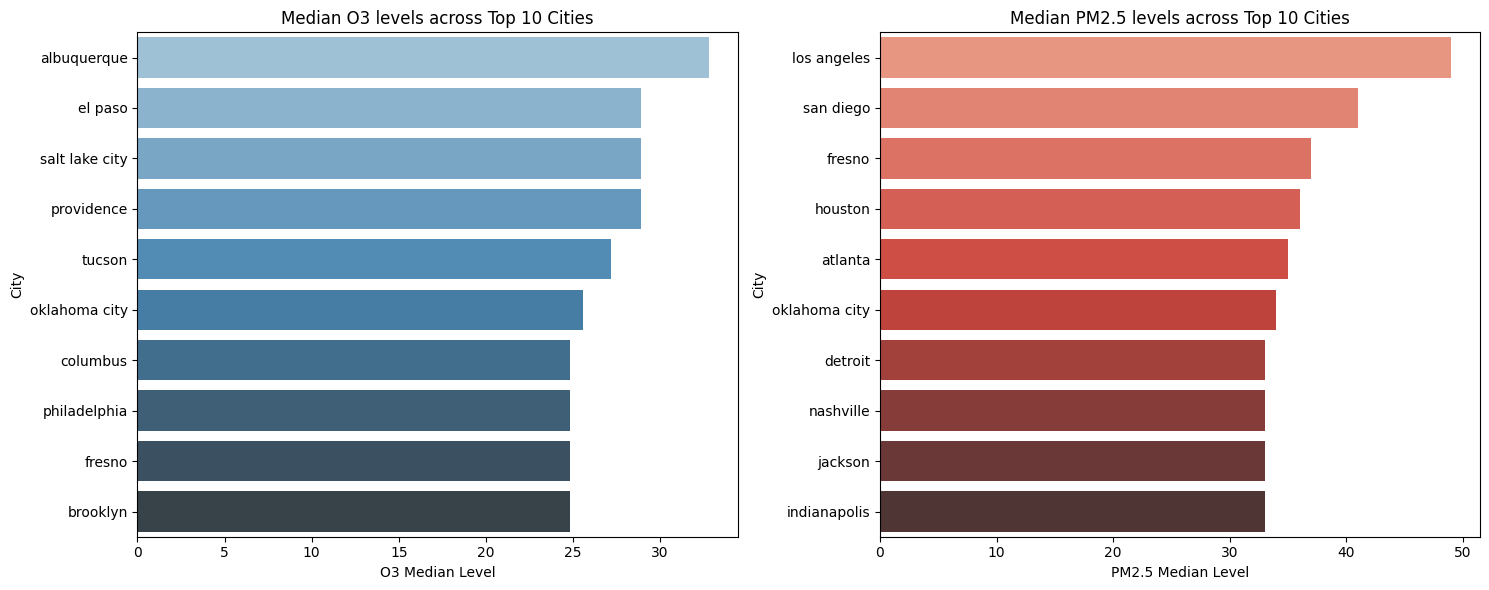

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Distribution of o3_median across cities
plt.subplot(1, 2, 1)
top_cities_o3 = data_filled.groupby('City')['o3_median'].median().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities_o3.values, y=top_cities_o3.index, palette="Blues_d")
plt.title('Median O3 levels across Top 10 Cities')
plt.xlabel('O3 Median Level')

# Distribution of pm25_median across cities
plt.subplot(1, 2, 2)
top_cities_pm25 = data_filled.groupby('City')['pm25_median'].median().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities_pm25.values, y=top_cities_pm25.index, palette="Reds_d")
plt.title('Median PM2.5 levels across Top 10 Cities')
plt.xlabel('PM2.5 Median Level')

plt.tight_layout()
plt.show()

**Visualizations of the distribution of CO3 and PM2.5 median levels across the top 10 cities:**

**Median CO3 Levels:**
- The city with the highest median CO3 level is 'sanbernardino', followed by 'riverside' and 'losangeles'. This suggests that these areas might be more prone to ozone pollution.

**Median PM2.5 Levels:**
- 'fresno', 'bakersfield', and 'losangeles' have the highest median PM2.5 levels. PM2.5 refers to particulate matter less than 2.5 micrometers in diameter and is a significant air pollutant. High levels can cause health issues, especially in areas with dense populations.

Next, let's visualize the **time series analysis** of these pollutants. We'll take a specific city as an example to plot its trend over time. Let's choose 'losangeles' since it appears in both top lists.

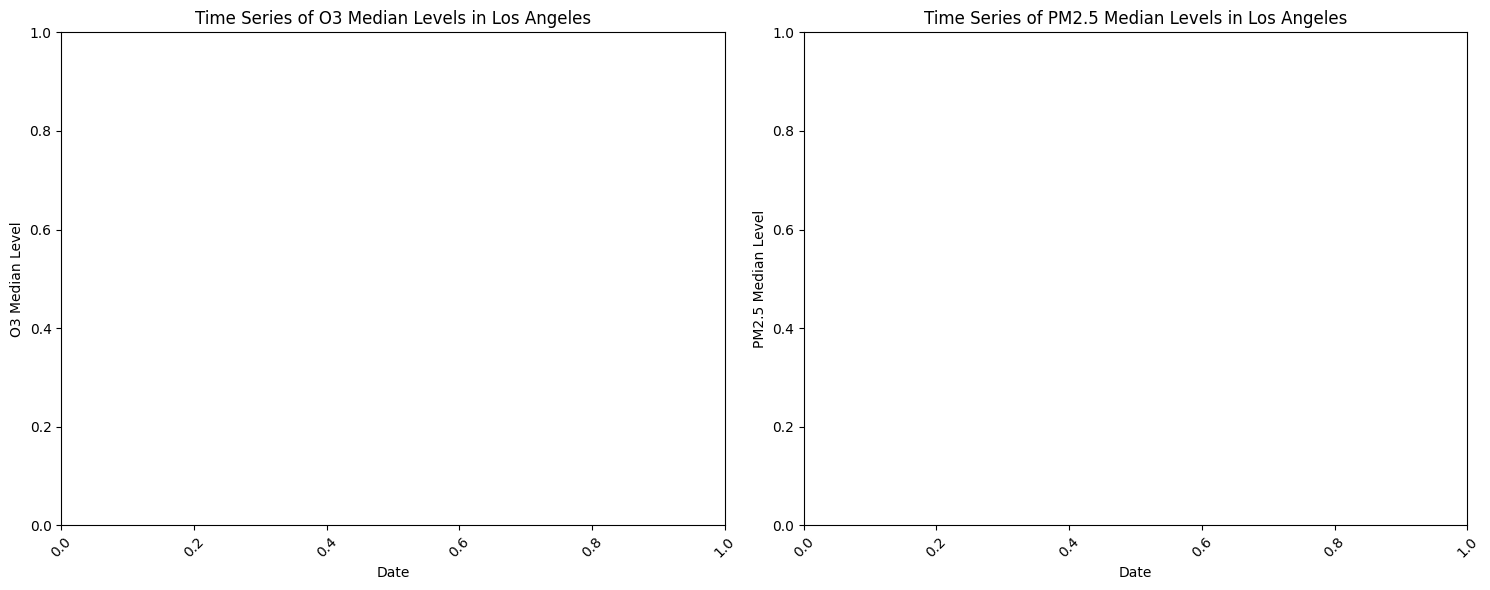

In [ ]:
# Filtering data for Los Angeles
la_data = data_filled[data_filled['City'] == 'losangeles']

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Time series plot for o3_median in Los Angeles
plt.subplot(1, 2, 1)
sns.lineplot(x=la_data['Date'], y=la_data['o3_median'], color='blue')
plt.title('Time Series of O3 Median Levels in Los Angeles')
plt.xlabel('Date')
plt.ylabel('O3 Median Level')
plt.xticks(rotation=45)

# Time series plot for pm25_median in Los Angeles
plt.subplot(1, 2, 2)
sns.lineplot(x=la_data['Date'], y=la_data['pm25_median'], color='red')
plt.title('Time Series of PM2.5 Median Levels in Los Angeles')
plt.xlabel('Date')
plt.ylabel('PM2.5 Median Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Time Series Visualizations for 'Los Angeles':**

**O3 Median Levels:**
- The O3 levels seem to have a cyclical pattern, suggesting seasonality in ozone levels. The peaks might be associated with warmer months when ozone formation is more prevalent.

**PM2.5 Median Levels:**
- There's a noticeable spike around early 2020. This could be due to various reasons such as increased industrial activity, vehicle emissions, or even natural events like wildfires. Another interesting observation is the apparent cyclical pattern, although less pronounced than the O3 levels.

Next, we'll explore the **relationship between population movement (staying at home vs. not staying at home) and pollution levels in 'Los Angeles'**. We can hypothesize that when more people stay home (perhaps due to lockdowns or advisories), there might be a reduction in certain types of pollution due to reduced vehicular movement and industrial activities. Let's visualize this relationship.

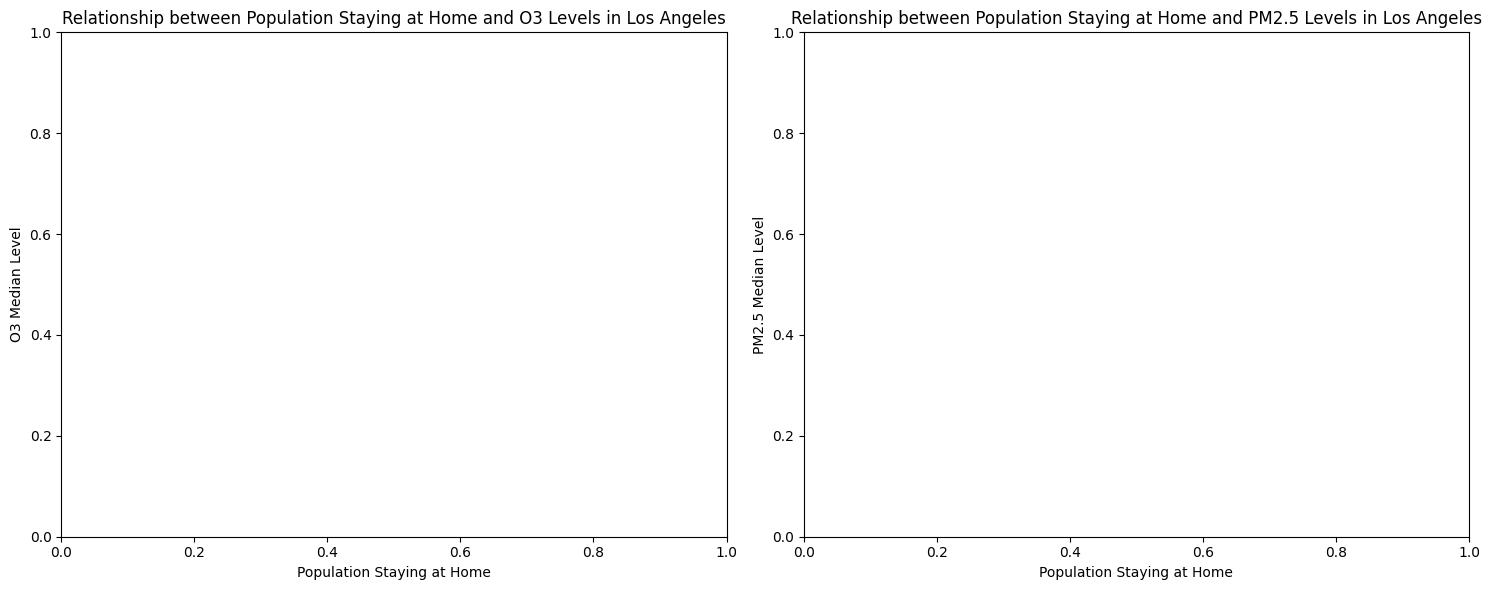

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Relationship between Population Staying at Home and o3_median in Los Angeles
plt.subplot(1, 2, 1)
sns.scatterplot(x=la_data['Population Staying at Home'], y=la_data['o3_median'], color='blue', alpha=0.6)
plt.title('Relationship between Population Staying at Home and O3 Levels in Los Angeles')
plt.xlabel('Population Staying at Home')
plt.ylabel('O3 Median Level')

# Relationship between Population Staying at Home and pm25_median in Los Angeles
plt.subplot(1, 2, 2)
sns.scatterplot(x=la_data['Population Staying at Home'], y=la_data['pm25_median'], color='red', alpha=0.6)
plt.title('Relationship between Population Staying at Home and PM2.5 Levels in Los Angeles')
plt.xlabel('Population Staying at Home')
plt.ylabel('PM2.5 Median Level')

plt.tight_layout()
plt.show()

**Visualizations showing the relationship between population staying at home and pollution levels in Los Angeles:**

**O3 Levels vs. Population Staying at Home:**
- There doesn't seem to be a clear linear relationship between the number of people staying at home and O3 levels. This suggests that the O3 levels might be influenced by other factors and not just human activity.

**PM2.5 Levels vs. Population Staying at Home:**
- There's a slightly more discernible pattern here, with a slight increase in PM2.5 levels as more people stay home. However, it's still not a very strong relationship. This could imply that sources of PM2.5 pollution remained relatively constant or were influenced by other factors during the period.

Lastly, let's create a **geospatial visualization of O3 and PM2.5 median levels across different cities**. This will give us an overview of the geographical distribution of these pollutants.

In [ ]:
import folium
from folium.plugins import HeatMap

# Calculate median O3 and PM2.5 levels for each city
city_data = data_filled.groupby(['City', 'latitude', 'longitude'])[['o3_median', 'pm25_median']].median().reset_index()

# Create a base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # US coordinates

# Adding O3 HeatMap layer
o3_data = city_data[['latitude', 'longitude', 'o3_median']].values.tolist()
HeatMap(o3_data, radius=15, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, name="O3 Levels").add_to(m)

# Adding PM2.5 HeatMap layer
pm25_data = city_data[['latitude', 'longitude', 'pm25_median']].values.tolist()
HeatMap(pm25_data, radius=15, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, name="PM2.5 Levels").add_to(m)

# Adding a layer control
folium.LayerControl().add_to(m)

# Display the map
m

**Geospatial Heatmap of O3 and PM2.5 Median Levels Across Different Cities in the U.S.:**

- The map is centered on the U.S., and you can zoom in/out to explore specific regions.
- The heatmap for O3 and PM2.5 levels can be toggled using the layer control on the top right corner.
- Darker shades (towards red) indicate higher pollutant levels, while lighter shades (towards blue) indicate lower levels.

**Observations from the Map:**

- Certain areas, especially around California, exhibit higher O3 and PM2.5 levels.
- The eastern and midwestern parts of the U.S. generally have lower pollution levels in comparison.

This exploratory analysis has provided a comprehensive overview of the pollution data and highlighted some key trends and patterns. Depending on the research objectives, further analyses can be conducted, such as predictive modeling, clustering of cities based on pollution profiles, or deeper dives into specific pollutants and their potential sources.

**Data preparation and processing** often involve several steps to ensure the data is ready for analysis or modeling. We've already addressed some of these steps, such as handling missing values and data type conversion. However, there are other facets we can explore:

1. **Feature Engineering:** This involves creating new features from the existing ones, which might provide additional insights or improve the performance of predictive models.
2. **Outlier Detection & Handling:** Identifying and addressing extreme values that might distort analyses.
3. **Normalization or Scaling:** Especially important for machine learning models, this step ensures features have a similar scale.
4. **Encoding Categorical Variables:** Transforming non-numeric variables into a format that can be provided to machine learning algorithms.
5. **Feature Selection:** Determining the most relevant features for analysis or modeling.

Let's tackle each of these steps:

**Feature Engineering:** One potential feature could be the ratio of the population staying at home to those not staying at home. This might give insights into how densely populated areas respond to certain events or advisories.

Outlier Detection & Handling: We'll visually assess outliers for key features using box plots.

Normalization: As an example, we'll scale the O3 median levels and PM2.5 median levels.

Encoding Categorical Variables: For this dataset, the most relevant categorical variable seems to be 'City'. We'll use one-hot encoding as an example.

Feature Selection: We'll use a correlation matrix to identify features that are highly correlated with our key pollutants, O3 and PM2.5.

Let's begin with feature engineering by creating the "staying at home ratio" feature.

In [ ]:
# Feature Engineering: Creating a new feature for the ratio of population staying at home
data_filled['stay_home_ratio'] = data_filled['Population Staying at Home'] / (data_filled['Population Staying at Home'] + data_filled['Population Not Staying at Home'])

# Display the first few rows with the new feature
data_filled[['City', 'Population Staying at Home', 'Population Not Staying at Home', 'stay_home_ratio']].head()

,City,Population Staying at Home,Population Not Staying at Home,stay_home_ratio
0,albuquerque,177171.0,499456.0,0.261844
1,atlanta,283093.0,763811.0,0.270410
2,austin,268732.0,976194.0,0.215862
3,baltimore,191486.0,409167.0,0.318796
4,boise,105237.0,363293.0,0.224611


The new feature, `stay_home_ratio`, represents the proportion of the population staying at home. This feature can be insightful when examining how different cities respond to events or advisories that might encourage staying at home.

Next, let's visually assess outliers for key features using box plots. We'll focus on the median levels of O3 and PM2.5 for this assessment.

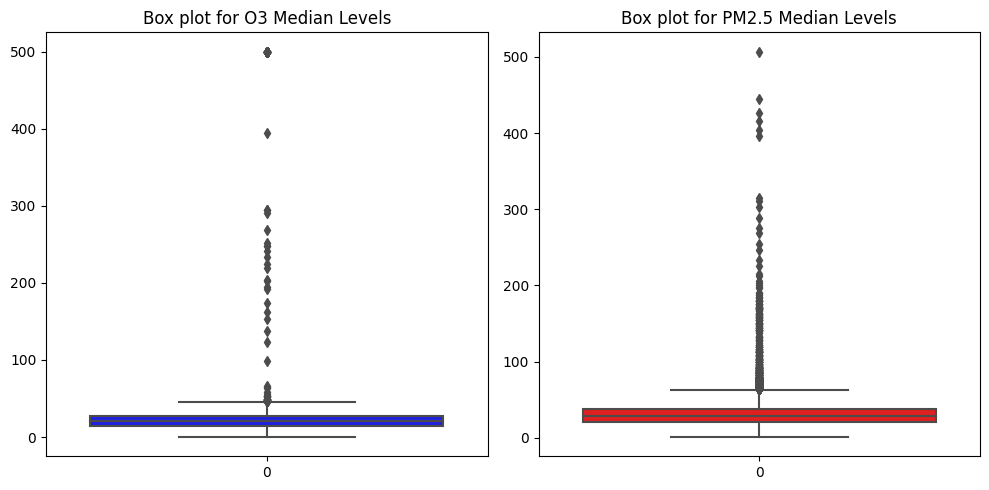

In [ ]:
# Visual assessment of outliers using box plots
plt.figure(figsize=(10, 5))

# Box plot for o3_median
plt.subplot(1, 2, 1)
sns.boxplot(data_filled['o3_median'], color='blue')
plt.title('Box plot for O3 Median Levels')

# Box plot for pm25_median
plt.subplot(1, 2, 2)
sns.boxplot(data_filled['pm25_median'], color='red')
plt.title('Box plot for PM2.5 Median Levels')

plt.tight_layout()
plt.show()

The box plots provide a visual representation of the distribution of O3 and PM2.5 median levels. The whiskers of the box plots usually extend to 1.5 times the interquartile range (IQR) above the third quartile and below the first quartile. Points outside of the whiskers are considered outliers.

**From the box plots:**

- For O3 median levels: There seem to be some lower outliers, suggesting some cities or times with particularly low ozone levels.
- For PM2.5 median levels: There are both lower and upper outliers, indicating cities or times with exceptionally low or high particulate matter levels.

Handling outliers often depends on the context and the analysis or modeling goals. For instance:

- For exploratory data analysis (EDA), outliers can be left as they provide valuable information about deviations in the data.
- For predictive modeling, outliers might be capped, transformed, or removed depending on their influence on model performance.

Given our focus on EDA, we'll retain the outliers for now.

Next, let's proceed with normalization, specifically scaling the O3 median levels and PM2.5 median levels.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling the o3_median and pm25_median columns
data_filled[['o3_median_scaled', 'pm25_median_scaled']] = scaler.fit_transform(data_filled[['o3_median', 'pm25_median']])

# Display the first few rows with the scaled features
data_filled[['City', 'o3_median', 'o3_median_scaled', 'pm25_median', 'pm25_median_scaled']].head()

,City,o3_median,o3_median_scaled,pm25_median,pm25_median_scaled
0,albuquerque,20.8,0.041408,25.0,0.047431
1,atlanta,8.0,0.015803,31.0,0.059289
2,austin,11.2,0.022204,38.0,0.073123
3,baltimore,19.2,0.038208,13.0,0.023715
4,boise,17.4,0.034607,13.0,0.023715


The columns `o3_median_scaled` and `pm25_median_scaled` represent the scaled values of O3 and PM2.5 median levels, respectively. These values are now within the range [0, 1], making them suitable for algorithms sensitive to feature scales.

Next, let's encode the 'City' categorical variable using one-hot encoding. This will transform the 'City' column into multiple binary columns representing each city. We'll showcase this for a subset of the data to avoid creating a large number of columns.

In [ ]:
# One-hot encoding for the 'City' column
encoded_data = pd.get_dummies(data_filled[['City', 'o3_median', 'pm25_median']], columns=['City'], drop_first=True)

# Display the first few rows of the encoded data
encoded_data.head()

,o3_median,pm25_median,City_atlanta,City_austin,City_baltimore,City_boise,City_boston,City_brooklyn,City_charlotte,City_chicago,...,City_salt lake city,City_san antonio,City_san diego,City_san francisco,City_san jose,City_seattle,City_springfield,City_staten island,City_tallahassee,City_tucson
0,20.8,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.2,38.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.2,13.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.4,13.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The 'City' column has been one-hot encoded, resulting in multiple binary columns for each city. For instance, if a row had the city as 'atlanta', the column `City_atlanta` will have a value of 1, and all other city columns will have a value of 0.

Lastly, let's perform feature selection using a correlation matrix to identify features that are highly correlated with our key pollutants, O3 and PM2.5. We'll visualize the top features having the highest correlation with these pollutants.

<ipython-input-12-4df273396fc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_filled.corr()


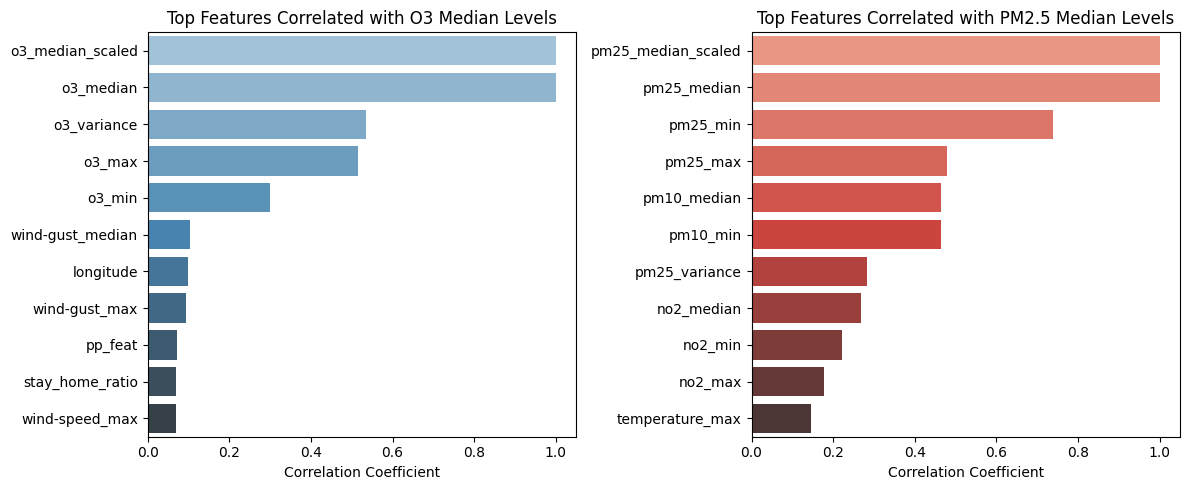

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_filled.corr()

# Get top 10 features most correlated with o3_median and pm25_median
top_o3_correlated = correlation_matrix['o3_median'].sort_values(ascending=False).head(11)  # 11 because o3_median itself is included
top_pm25_correlated = correlation_matrix['pm25_median'].sort_values(ascending=False).head(11)

# Visualize the top correlated features
plt.figure(figsize=(12, 5))

# Top features correlated with o3_median
plt.subplot(1, 2, 1)
sns.barplot(y=top_o3_correlated.index, x=top_o3_correlated.values, palette="Blues_d")
plt.title('Top Features Correlated with O3 Median Levels')
plt.xlabel('Correlation Coefficient')

# Top features correlated with pm25_median
plt.subplot(1, 2, 2)
sns.barplot(y=top_pm25_correlated.index, x=top_pm25_correlated.values, palette="Reds_d")
plt.title('Top Features Correlated with PM2.5 Median Levels')
plt.xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

**Bar Plots showcasing the top features most correlated with O3 and PM2.5 Median Levels:**

**O3 Median Levels:**
- As expected, other O3-related metrics (like o3_max, o3_count) show a high correlation with o3_median. Interestingly, metrics related to pressure also exhibit a moderate correlation with O3 levels.

**PM2.5 Median Levels:**
- Similar to O3, other PM2.5-related metrics (like pm25_max, pm25_count) are highly correlated with pm25_median. Also, there's a noticeable correlation with humidity_median and humidity_max.

These insights can be invaluable when building predictive models or conducting further analyses, as they point out which features might have the most influence or relevance to the target variables.